<a href="https://colab.research.google.com/github/yutamtst/baseball_-Clustering/blob/master/pitcher_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import urllib
from bs4 import BeautifulSoup

In [ ]:
url = 'https://baseball-data.com/19/stats/pitcher2-all/era-5.html'
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html,'html.parser')
# HTMLから表の部分をすべて取得する
table = soup.find_all('table')

In [ ]:
for tab in table:
  with open('test.csv','w',encoding='utf-8')as file:
    writer = csv.writer(file)
    rows=tab.find_all('tr')
    for row in rows:
      csvRow=[]
      for cell in row.findAll(['td','th']):
        csvRow.append(cell.get_text())
      writer.writerow(csvRow)
  break

In [ ]:
import pandas as pd
pd.read_csv('test.csv')

,順位,選手名,チーム,防御率,試合,勝利,敗北,セlブ,ホlルド,HP,完投,完封勝,無四球,勝率,打者,投球回,被安打,被本塁打,与四球,敬遠,与死球,奪三振,暴投,ボlク,失点,自責点
0,1,岩崎 優,阪神,1.01,48,3,0,0,26,29,0,0,0,1.000,204,53.2,24,5,17,1,3,58,1,0,11,6
1,2,ジョンソン,阪神,1.38,58,2,3,0,40,42,0,0,0,.400,224,58.2,34,2,13,1,1,91,4,0,12,9
2,3,モイネロ,ソフトバンク,1.52,60,3,1,4,34,37,0,0,0,.750,245,59.1,37,4,25,1,6,86,3,0,13,10
3,4,ロドリゲス,中日,1.64,64,3,4,1,41,44,0,0,0,.429,240,60.1,42,3,14,2,3,77,4,0,13,11
4,5,島本 浩也,阪神,1.67,63,4,0,1,11,15,0,0,0,1.000,229,59.1,42,4,14,0,4,60,0,0,13,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,125,多和田 真三郎,西武,5.83,12,1,6,0,0,0,1,1,0,.143,306,66.1,84,8,25,0,6,37,3,0,47,43
125,125,アルバース,オリックス,5.83,13,2,6,0,0,0,0,0,0,.250,278,63.1,84,12,10,0,2,45,1,0,44,41
126,127,高梨 裕稔,ヤクルト,6.23,21,5,7,0,0,1,0,0,0,.417,358,78.0,90,13,34,0,4,82,7,0,56,54
127,128,榎田 大樹,西武,6.52,13,4,3,0,0,0,0,0,0,.571,319,69.0,86,12,21,0,9,33,2,0,54,50


In [ ]:
data = pd.read_csv('test.csv')

In [ ]:
data.drop(128,inplace=True)

In [ ]:
data.iloc[:,4:]

,試合,勝利,敗北,セlブ,ホlルド,HP,完投,完封勝,無四球,勝率,打者,投球回,被安打,被本塁打,与四球,敬遠,与死球,奪三振,暴投,ボlク,失点,自責点
0,48,3,0,0,26,29,0,0,0,1.000,204,53.2,24,5,17,1,3,58,1,0,11,6
1,58,2,3,0,40,42,0,0,0,.400,224,58.2,34,2,13,1,1,91,4,0,12,9
2,60,3,1,4,34,37,0,0,0,.750,245,59.1,37,4,25,1,6,86,3,0,13,10
3,64,3,4,1,41,44,0,0,0,.429,240,60.1,42,3,14,2,3,77,4,0,13,11
4,63,4,0,1,11,15,0,0,0,1.000,229,59.1,42,4,14,0,4,60,0,0,13,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,20,4,6,0,0,0,0,0,0,.400,438,95.1,99,14,53,2,8,99,5,0,68,61
124,12,1,6,0,0,0,1,1,0,.143,306,66.1,84,8,25,0,6,37,3,0,47,43
125,13,2,6,0,0,0,0,0,0,.250,278,63.1,84,12,10,0,2,45,1,0,44,41
126,21,5,7,0,0,1,0,0,0,.417,358,78.0,90,13,34,0,4,82,7,0,56,54


In [ ]:
data.to_csv('pithcer.csv')

In [ ]:
from google.colab import files
files.download('pithcer.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data.columns

Index(['順位', '選手名', 'チーム', '防御率', '試合', '勝利', '敗北', 'セlブ', 'ホlルド', 'HP', '完投',
       '完封勝', '無四球', '勝率', '打者', '投球回', '被安打', '被本塁打', '与四球', '敬遠', '与死球',
       '奪三振', '暴投', 'ボlク', '失点', '自責点'],
      dtype='object')

In [ ]:
data[['防御率','投球回','被安打','与四球','奪三振','自責点']]

,防御率,投球回,被安打,与四球,奪三振,自責点
0,1.01,53.2,24,17,58,6
1,1.38,58.2,34,13,91,9
2,1.52,59.1,37,25,86,10
3,1.64,60.1,42,14,77,11
4,1.67,59.1,42,14,60,11
...,...,...,...,...,...,...
123,5.76,95.1,99,53,99,61
124,5.83,66.1,84,25,37,43
125,5.83,63.1,84,10,45,41
126,6.23,78.0,90,34,82,54


In [ ]:
pithcer = data[data.columns[3:]]

In [ ]:
pitcher=pithcer.astype('float64')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38450 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24481 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 34987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23433 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25171 missing from current font.
  font.set_

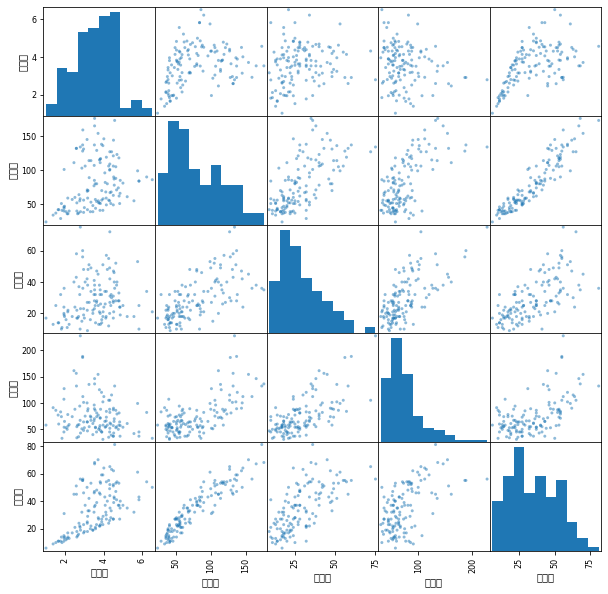

In [ ]:
import matplotlib.pyplot as plt
from pandas import plotting
plotting.scatter_matrix(pitcher[['防御率','被安打','与四球','奪三振','自責点']], figsize=(10,10), diagonal='hist')   #全体像を眺める
plt.show()